# DSCI 100 Group Project Proposal: Heart Disease Diagnosis Classification

### 1. Introduction

### 2. Preliminary Exploratory Data Analysis
#### Reading the Data

In [79]:
library(repr)
library(tidyverse)
library(tidymodels)
library(cowplot)
options(repr.matrix.max.rows = 6)

In [35]:
url <- "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

heart_data <- read_delim(url,
                           col_names = c("age", "sex", "cp", "trestbps", 
                                         "chol", "fbs", "restecg", "thalach", 
                                         "exang", "oldpeak", "slope", "ca", "thal", "num"))
heart_data

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): ca, thal
dbl (12): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


*Table 1: Heart Disease Dataset from the Web*

In [41]:
# cleaning the data
tidy_heart_data <- heart_data |>
    rename(diagnosis = num) |>
    mutate(diagnosis = as_factor(diagnosis),
           diagnosis = case_when(diagnosis %in% c(1, 2, 3, 4) ~ "Yes", diagnosis %in% 0 ~ "No"))

# splitting the data
heart_split <- initial_split(tidy_heart_data,
                            prop = 0.75,
                            strata = diagnosis)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)

heart_train

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,diagnosis
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,No
37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,No
41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,No
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
59,1,4,164,176,1,2,90,0,1.0,2,2.0,6.0,Yes
68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,Yes
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,Yes


*Table 2: Training Data Set*

#### Summary Statistics

In [32]:
missing_values <- data.frame(missing_values = sum(is.na(heart_train)))
missing_values

missing_values
<int>
0


*Table 3: Summary Table on Missing Values in the Data Set*

In [44]:
number_obs <- nrow(heart_train)
            heart_train |>
            group_by(diagnosis) |>
            summarize(count = n(), percentage = n() / number_obs * 100)

diagnosis,count,percentage
<chr>,<int>,<dbl>
No,123,54.18502
Yes,104,45.81498


*Table 4: Summary Table on Variable Distribution*

In [55]:
# finding the mean and standard devation statistics for each predictor
mean_and_sd <- heart_train |>
    summarize(mean_age = mean(age, na.rm = TRUE), 
              mean_thalach = mean(thalach, na.rm = TRUE), 
              mean_trestbps = mean(trestbps, na.rm = TRUE),
              sd_age = sd(age, na.rm = TRUE), 
              sd_thalach = sd(thalach, na.rm = TRUE), 
              sd_trestbps = sd(trestbps, na.rm = TRUE))
mean_and_sd

mean_age,mean_thalach,mean_trestbps,sd_age,sd_thalach,sd_trestbps
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
54.50661,150.0837,132.022,8.95879,22.68497,17.44712


*Figure 5: Mean & Standard Deviation Statistics for Each Predictor*

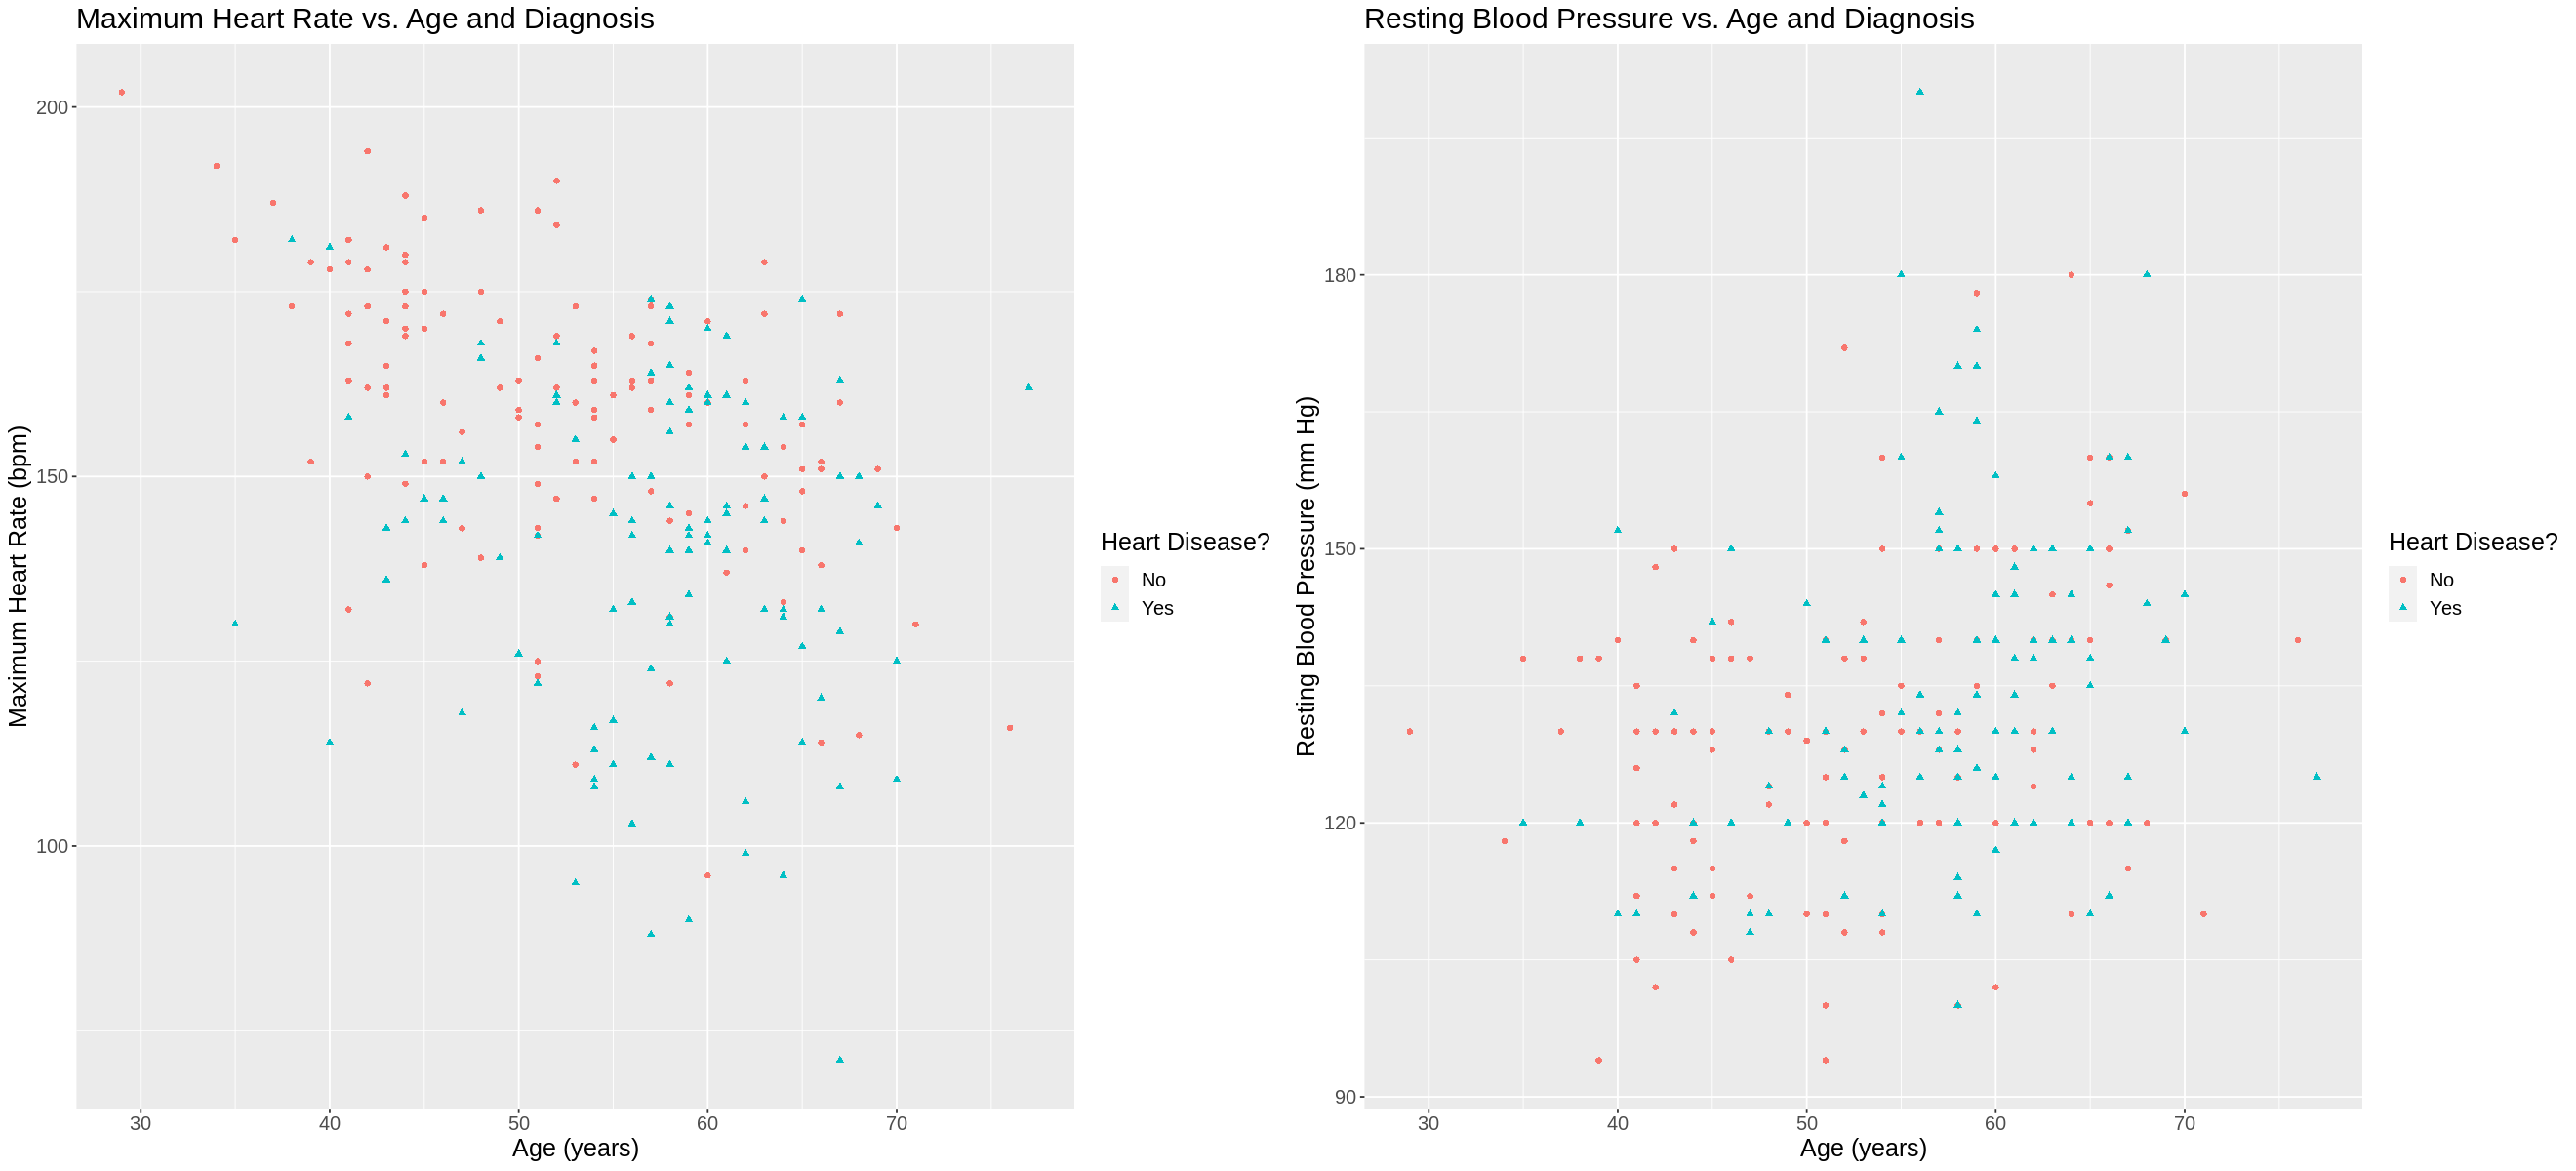

In [78]:
heart_scaled <- heart_train |>
    mutate(scaled_age = scale(age, center = TRUE), 
           scaled_thalach = scale(thalach, center = TRUE))

options(repr.plot.width = 22, repr.plot.height = 10)

# creating a summary visualization
thalach_vs_age <- heart_train |>
    ggplot(aes(x = age, y = thalach, color = diagnosis, shape = diagnosis)) +
    geom_point() + 
    labs(x = "Age (years)", 
         y = "Maximum Heart Rate (bpm)", 
         color = "Heart Disease?", 
         shape = "Heart Disease?") +
    ggtitle("Maximum Heart Rate vs. Age and Diagnosis") +
    theme(text = element_text(size = 15))

trestbps_vs_age <- heart_train |>
    ggplot(aes(x = age, y = trestbps, color = diagnosis, shape = diagnosis)) +
    geom_point() + 
    labs(x = "Age (years)", 
         y = "Resting Blood Pressure (mm Hg)", 
         color = "Heart Disease?", 
         shape = "Heart Disease?") +
    ggtitle("Resting Blood Pressure vs. Age and Diagnosis") +
    theme(text = element_text(size = 15))

plot_grid(thalach_vs_age, trestbps_vs_age,
          label_size = 10)

### 4. Methods

### 5. Expected Outcome and Significance

### References

Aha, D. W. (1988). Heart Disease Data Set [Data set]. UCI: Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/Heart+Disease